In [1]:
# SPLITTING TRAINING DATA INTO TRAINING AND VALIDATION SETS
# This script is used to split the training data into training and validation sets. 

# -------- SYNTHETIC DATA --------
# Test should be 10k (2697-2701) folder name DEEPL SyntheticD Test 
# Validation should be 10k (2425-2428) folder name DEEPL SyntheticD Validation
# Training should be 200k (1-1054) folder name DEEPL SyntheticD Training

In [2]:
import os
import pandas as pd

# Function to extract image paths and labels with corrected paths, starting from the first files
def extract_image_paths_and_labels_corrected(annotation_file, base_folder, num_images):
    image_paths = []
    labels = []
    with open(annotation_file, 'r') as f:
        lines = f.readlines()
    
    lines.sort()  # Sort the lines to ensure we start from the first files
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        image_path, _ = parts
        label = image_path.split('_')[1]
        # Remove './' from the path
        corrected_image_path = os.path.join(base_folder, image_path[2:])
        image_paths.append(corrected_image_path)
        labels.append(label)
        if len(image_paths) >= num_images:
            break
    return image_paths, labels

# Paths to annotation files and base folders
training_folder = 'Synthetic/DEEPL SyntheticD Train Def'
validation_folder = 'Synthetic/DEEPL SyntheticD Val Def'
test_folder = 'Synthetic/DEEPL SyntheticD Test Def'

annotation_train_file = 'Synthetic/annotation_train.txt'
annotation_val_file = 'Synthetic/annotation_val.txt'
annotation_test_file = 'Synthetic/annotation_test.txt'

# Extract data with corrected image paths
train_images, train_labels = extract_image_paths_and_labels_corrected(annotation_train_file, training_folder, 200000)
val_images, val_labels = extract_image_paths_and_labels_corrected(annotation_val_file, validation_folder, 10000)
test_images, test_labels = extract_image_paths_and_labels_corrected(annotation_test_file, test_folder, 10000)

# Create dataframes
train_df = pd.DataFrame({'image_path': train_images, 'label': train_labels})
val_df = pd.DataFrame({'image_path': val_images, 'label': val_labels})
test_df = pd.DataFrame({'image_path': test_images, 'label': test_labels})

# Save to CSV files
train_df.to_csv('train_datadef.csv', index=False)
val_df.to_csv('val_datadef.csv', index=False)
test_df.to_csv('test_datadef.csv', index=False)

# Create dictionaries from the dataframes
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient='records')
test_dict = test_df.to_dict(orient='records')

In [5]:
# Display samples of the dictionaries
print("Training Data Sample:", train_dict[:5])
print("Validation Data Sample:", val_dict[:5])
print("Test Data Sample:", test_dict[:5])

print("\nNumber of Training Samples:", len(train_dict))
print("Number of Validation Samples:", len(val_dict))
print("Number of Test Samples:", len(test_dict))

Training Data Sample: [{'image_path': 'Synthetic/DEEPL SyntheticD Train Def/1/1/100_Classmates_13991.jpg', 'label': 'Classmates'}, {'image_path': 'Synthetic/DEEPL SyntheticD Train Def/1/1/101_greater_33598.jpg', 'label': 'greater'}, {'image_path': 'Synthetic/DEEPL SyntheticD Train Def/1/1/102_BULLFROG_10132.jpg', 'label': 'BULLFROG'}, {'image_path': 'Synthetic/DEEPL SyntheticD Train Def/1/1/103_NUCLEAR_52503.jpg', 'label': 'NUCLEAR'}, {'image_path': 'Synthetic/DEEPL SyntheticD Train Def/1/1/104_maximilian_47254.jpg', 'label': 'maximilian'}]
Validation Data Sample: [{'image_path': 'Synthetic/DEEPL SyntheticD Val Def/2425/1/116_CASTLING_11904.jpg', 'label': 'CASTLING'}, {'image_path': 'Synthetic/DEEPL SyntheticD Val Def/2425/1/117_publicizes_61084.jpg', 'label': 'publicizes'}, {'image_path': 'Synthetic/DEEPL SyntheticD Val Def/2425/1/118_pegged_56320.jpg', 'label': 'pegged'}, {'image_path': 'Synthetic/DEEPL SyntheticD Val Def/2425/1/119_VIOLIN_84727.jpg', 'label': 'VIOLIN'}, {'image_path

(31, 110, 3)


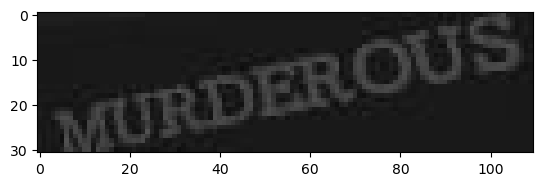

In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Synthetic/DEEPL SyntheticD Train Def/1/1/122_MURDEROUS_50453.jpg')

cv2.imshow('image', img)
plt.imshow(img)
print(img.shape)

In [ ]:
# -------- REAL DATA --------
# Test should be 1k 
# Validation should be 1
# Training should be 3k